In [ ]:
# This Notebook loads a dataset from memory, calculates NDBI on the result set, and plots the results. 
# NDBI = (SWIR – NIR)/(SWIR + NIR)

In [15]:
import datacube
from datacube.storage import masking

dc = datacube.Datacube()

In [16]:
# Declare some 'constants' for the program
p = 'LC08_scene'
res = (0.0025, -0.0025)
m = ['swir2', 'nir', 'quality'] 

In [17]:
# Load the data into memory
two_bands = dc.load(product = p
                    , measurements = m
                    #, time= (start, end)
                    , resolution = res
                   )

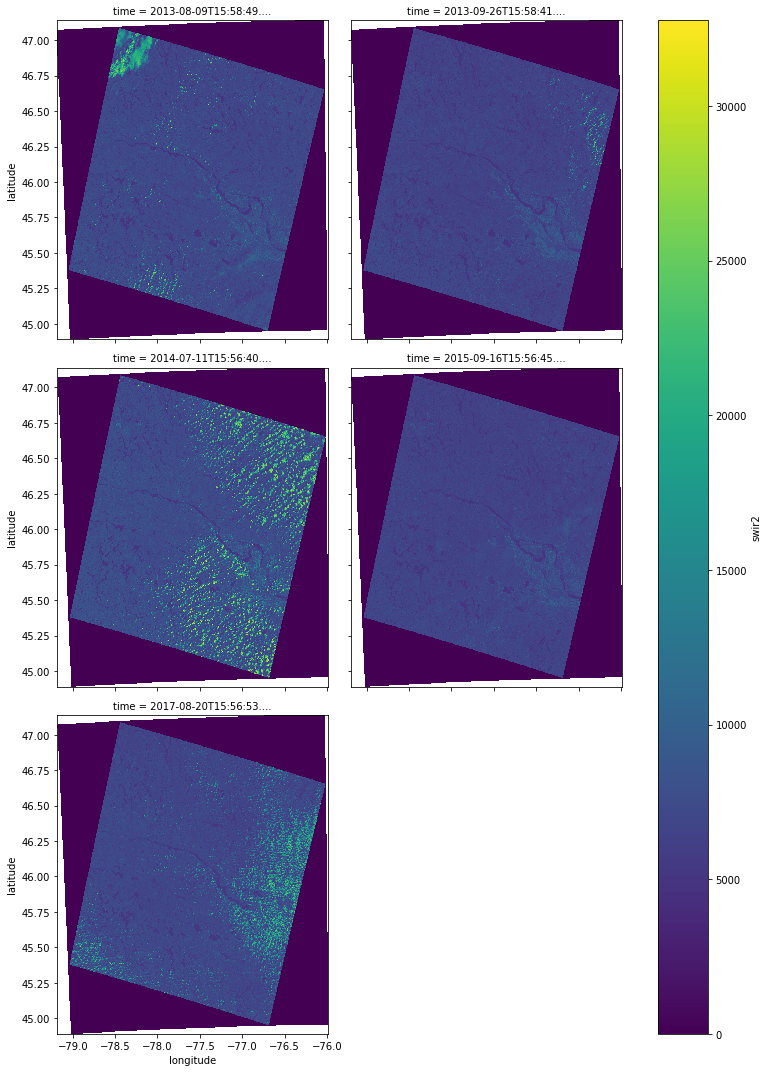

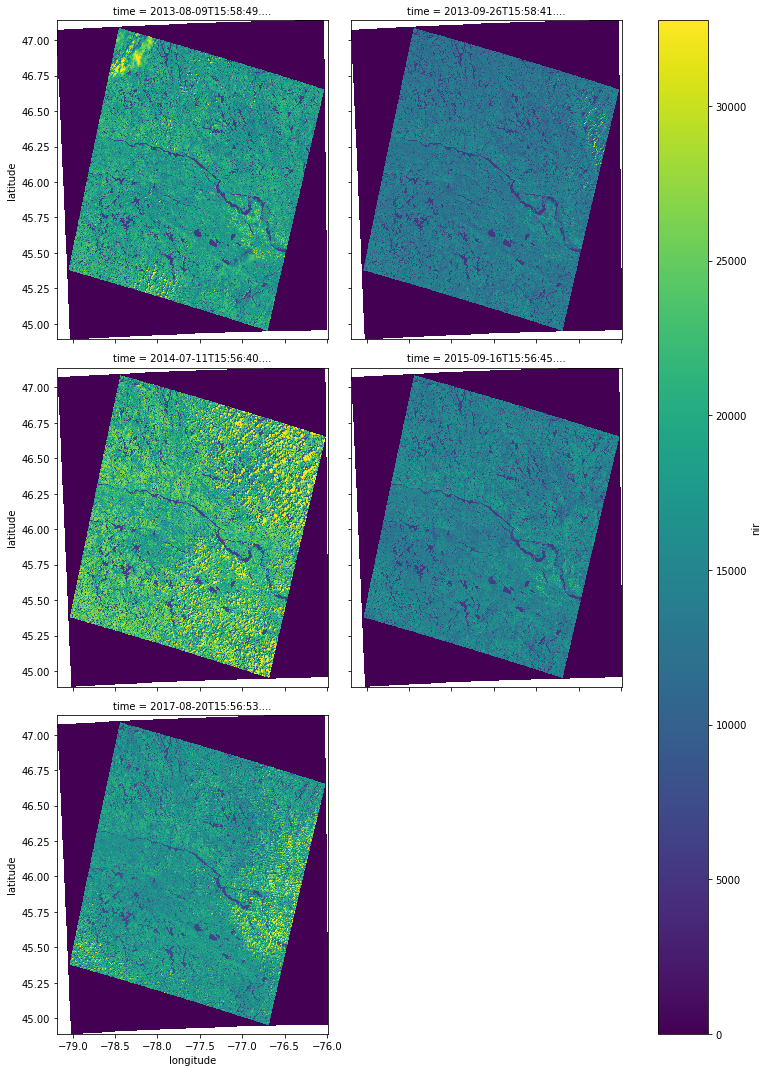

In [19]:
# Isolate all valid data in the the two bands of interest
swir = two_bands.swir2.where(two_bands.swir2 != two_bands.swir2.attrs['nodata'])
nir = two_bands.nir.where(two_bands.nir != two_bands.nir.attrs['nodata'])
swir.plot(col='time'
          , col_wrap = 2
          , size = 5)
nir.plot(col='time'
          , col_wrap = 2
          , size = 5)

In [20]:
cloud_free = masking.make_mask(two_bands, cloud=False).quality

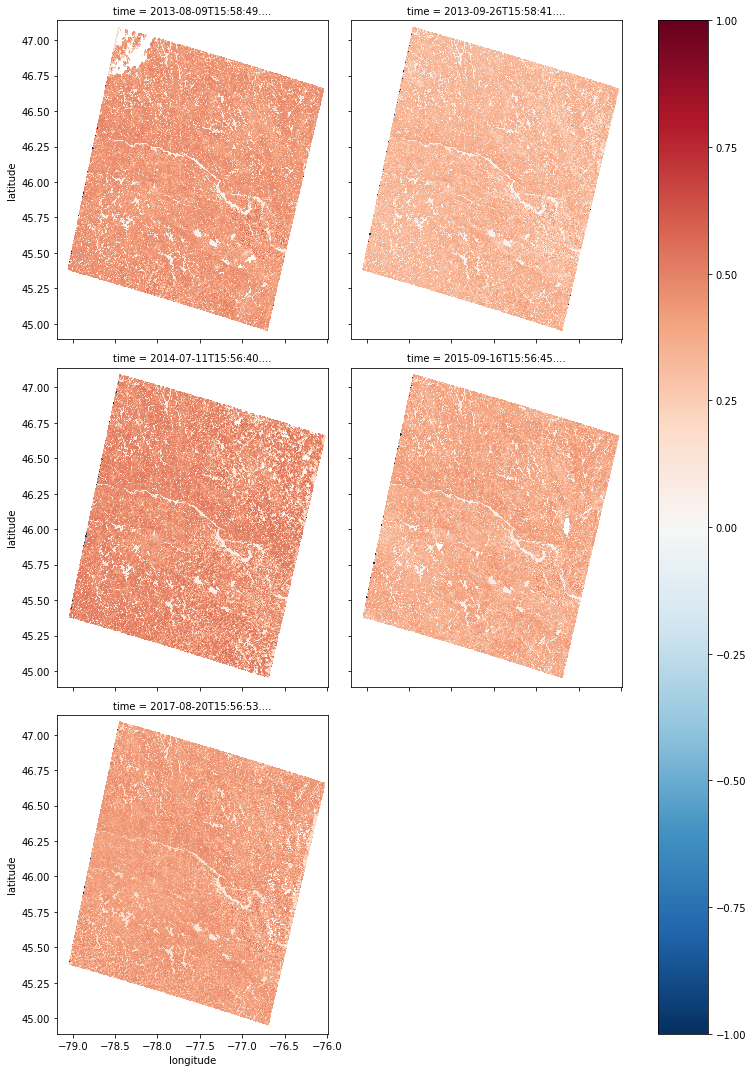

In [21]:
#Calculate and plot the NDBI
ndbi = ((nir - swir) / (nir + swir)).where(cloud_free)
ndbi.plot(col='time'
          , col_wrap = 2
          , size = 5)